<a href="https://colab.research.google.com/github/IsadoraPrevitalle/TCC-Eficiencia_RedesNeurais_PrevisaoSeriesFinanceiras/blob/Suavizacao_Exponencial_previsao/Suavizacao_Exponencial_Previs%C3%A3oVendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prevendo valores de venda para o ano de 2024 com base nos dados de venda de 2023

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [6]:
df = pd.read_csv('dataset.csv')

In [7]:
df.shape

(365, 2)

In [10]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [11]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


Pré-Processamento dos Dados

In [14]:
df['Data'].min()

'2023-01-01'

In [15]:
df['Data'].max()

'2023-12-31'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [17]:
df['Data'] = pd.to_datetime(df['Data'])

In [18]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [20]:
serie_temp = df.set_index('Data')['Total_Vendas']

In [21]:
type(serie_temp)

pandas.core.series.Series

In [22]:
serie_temp.head()

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
Name: Total_Vendas, dtype: float64

In [23]:
serie_temp = serie_temp.asfreq('D')

In [24]:
serie_temp.head()

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
Freq: D, Name: Total_Vendas, dtype: float64

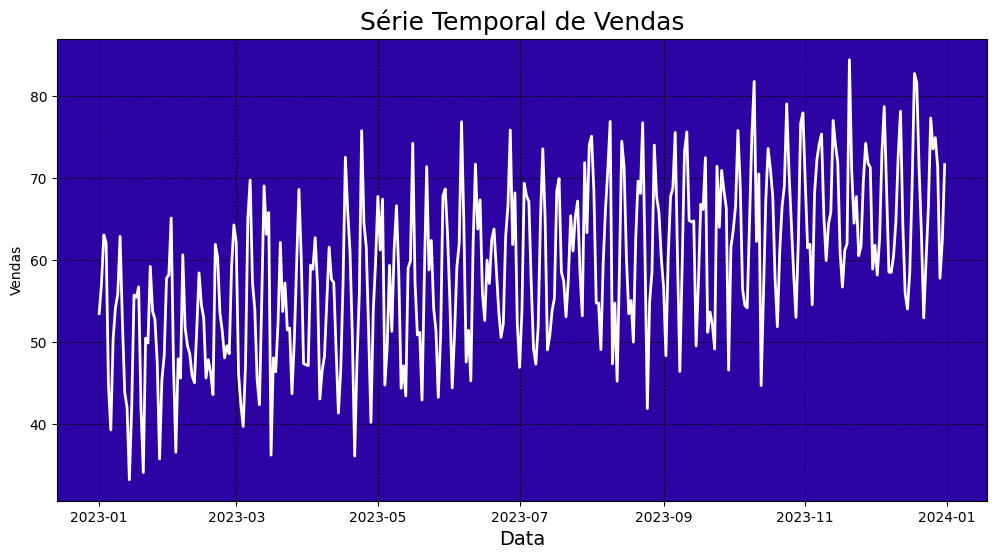

In [28]:
plt.figure(figsize=(12,6))
plt.plot(serie_temp, color = 'white', linewidth = 2)
plt.gca().set_facecolor('#2e03a3')
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)
plt.show()

Suavização Exponencial

In [29]:
modelo = SimpleExpSmoothing(serie_temp)

In [43]:
#Ajuste do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.5)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [44]:
#Extrai os valores previstos pelo modelo
suavizacao_exp = modelo_ajustado.fittedvalues

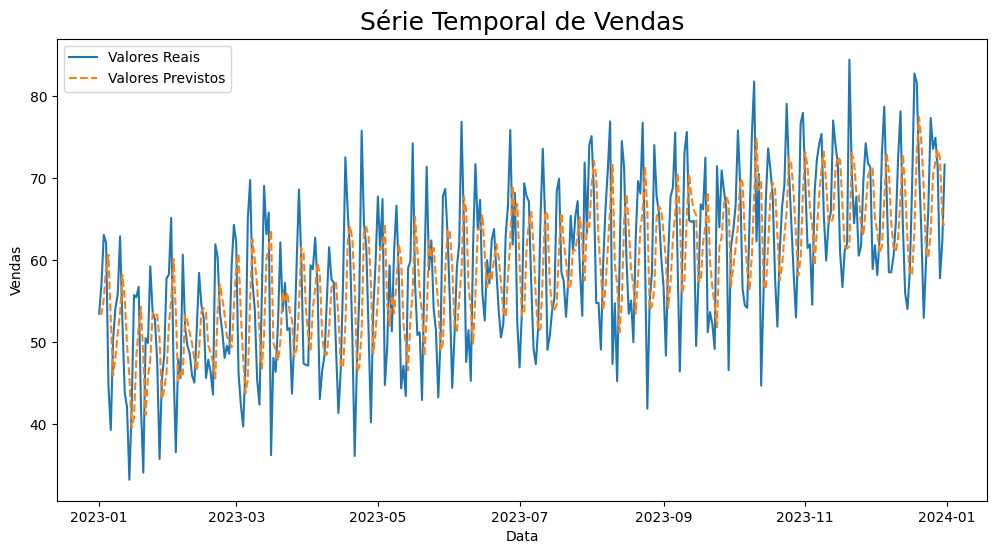

In [45]:
plt.figure(figsize=(12,6))
plt.plot(serie_temp, label = 'Valores Reais')
plt.plot(suavizacao_exp, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)
plt.legend()
plt.show()

In [47]:
num_prev = 1
previsoes = modelo_ajustado.forecast(steps = num_prev)
previsoes

2024-01-01    67.687825
Freq: D, dtype: float64